### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url1=r"C:\Users\rzepeda\Dropbox\Documentos\Estudios\OracleOneAlura\Python\Challenge1\tienda_1.csv"
url2=r"C:\Users\rzepeda\Dropbox\Documentos\Estudios\OracleOneAlura\Python\Challenge1\tienda_2.csv"
url3=r"C:\Users\rzepeda\Dropbox\Documentos\Estudios\OracleOneAlura\Python\Challenge1\tienda_3.csv"
url4=r"C:\Users\rzepeda\Dropbox\Documentos\Estudios\OracleOneAlura\Python\Challenge1\tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.sample(6)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
347,Balón de baloncesto,Deportes y diversión,67500.0,4000.0,29/03/2023,Beatriz Morales,Barranquilla,3,Tarjeta de crédito,8,10.96854,-74.78132
1898,Lavavajillas,Electrodomésticos,1187600.0,63500.0,01/11/2020,Juliana Costa,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
1526,Armario,Muebles,517800.0,28200.0,12/11/2021,Pedro Gomez,Cúcuta,4,Tarjeta de crédito,1,7.89391,-72.50782
2094,Microondas,Electrodomésticos,698200.0,35400.0,01/03/2021,Izabela de León,Bucaramanga,5,Tarjeta de crédito,10,7.12539,-73.11980
1246,Secadora de ropa,Electrodomésticos,1350600.0,72600.0,18/02/2023,Camila Rivera,Medellín,5,Tarjeta de crédito,3,6.25184,-75.56359
656,Bicicleta,Deportes y diversión,627500.0,34100.0,01/01/2023,Maria Alfonso,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175


#1. Análisis de facturación



              Ingresos
Tienda 1 1,150,880,400
Tienda 2 1,116,343,500
Tienda 3 1,098,019,600
Tienda 4 1,038,375,700


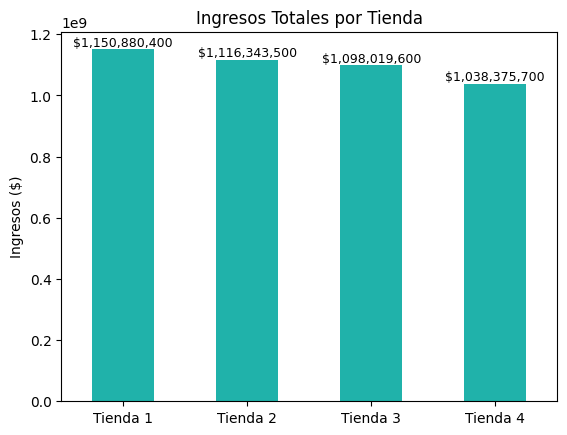

In [9]:
#Calculas los ingresos totales de cada tienda

#for x in range(1,5):
#    print("-----------------------------------------------------------------------------")
#    ingresos = eval(f'tienda{x}["Precio"].sum()')
#    print(f"Ingresos totales de la tienda {x}: ${eval(f'ingresos{x}')}")

# Agrupamos los DataFrames en un diccionario
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Calculamos ingresos totales
ingresos_totales = {nombre: df["Precio"].sum() for nombre, df in tiendas.items()}
df_ingresos = pd.DataFrame.from_dict(ingresos_totales, orient='index', columns=['Ingresos'])
pd.options.display.float_format = '{:,.0f}'.format
print(df_ingresos)

# Gráfico de barras para ingresos totales por tienda
ax = df_ingresos.plot(kind='bar', color='lightseagreen', legend=False)
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=0)

# Mostrar etiquetas numéricas encima de cada barra
for i, v in enumerate(df_ingresos["Ingresos"]):
    ax.text(i, v, f"${v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.show()

# 2. Ventas por categoría

-----------------------------------------------------------------------------
El top 5 de ventas por categoría en la tienda 1 es: 
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: Producto, dtype: int64
-----------------------------------------------------------------------------


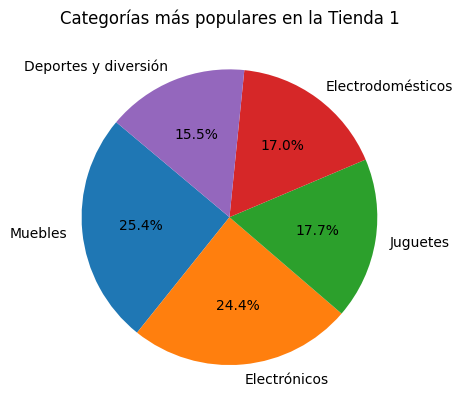

El top 5 de ventas por categoría en la tienda 2 es: 
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: Producto, dtype: int64
-----------------------------------------------------------------------------


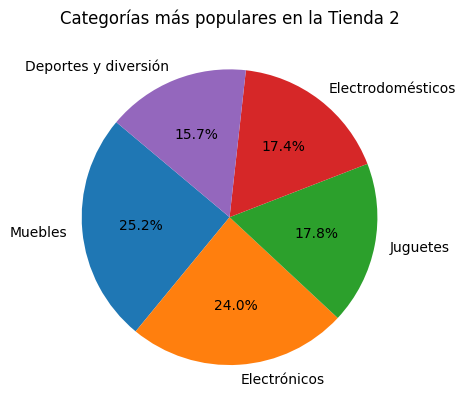

El top 5 de ventas por categoría en la tienda 3 es: 
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: Producto, dtype: int64
-----------------------------------------------------------------------------


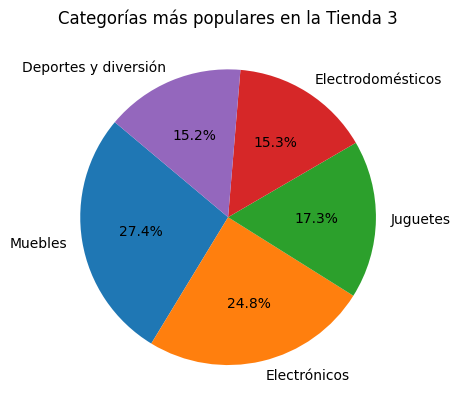

El top 5 de ventas por categoría en la tienda 4 es: 
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: Producto, dtype: int64
-----------------------------------------------------------------------------


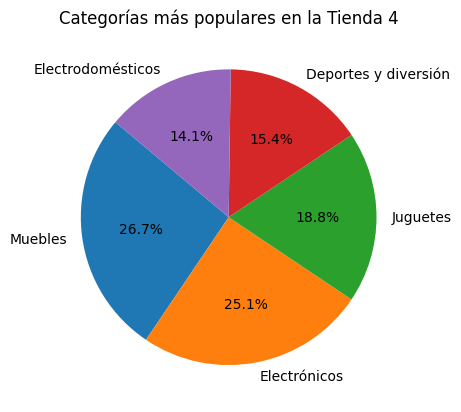

In [ ]:
#Calcular cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.
print("-----------------------------------------------------------------------------")
categorias1 = tienda1.groupby("Categoría del Producto")['Producto'].count()

for x in range(1,5):
    categorias = eval(f'tienda{x}.groupby("Categoría del Producto")["Producto"].count()')
    print(f"El top 5 de ventas por categoría en la tienda {x} es: ")
    print(categorias.sort_values(ascending=False).head(5))
    print("-----------------------------------------------------------------------------")
# modificar el codigo previo para que en lugar de imprimir los resultados, genere un gráfico pie para cada tienda mostrando las categorías más populares y sus cantidades de ventas.
    ax = categorias.sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=False)
    plt.title(f'Categorías más populares en la Tienda {x}')
    plt.ylabel('')  # Ocultar la etiqueta del eje y
    plt.show()
    

# 3. Calificación promedio de la tienda


Calificación promedio de los clientes en la tienda 1: 3.98
Calificación promedio de los clientes en la tienda 2: 4.04
Calificación promedio de los clientes en la tienda 3: 4.05
Calificación promedio de los clientes en la tienda 4: 4.00


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Tienda 1'),
  Text(1, 0, 'Tienda 2'),
  Text(2, 0, 'Tienda 3'),
  Text(3, 0, 'Tienda 4')])

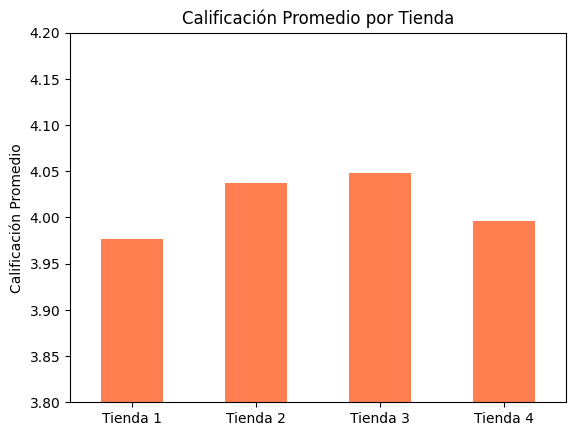

In [ ]:
#calcular las calificaciones promedio de los clientes para cada tienda
for x in range(1,5):
    calificacion_promedio = eval(f'tienda{x}["Calificación"].mean()')
    print(f"Calificación promedio de los clientes en la tienda {x}: {calificacion_promedio:.2f}")

#generar un grafico de columna para comparar las calificaciones promedio de las cuatro tiendas.
calificaciones_promedio = {f'Tienda {x}': eval(f'tienda{x}["Calificación"].mean()') for x in range(1,5)}
df_calificaciones = pd.DataFrame.from_dict(calificaciones_promedio, orient='index', columns=['Calificación Promedio'])
ax = df_calificaciones.plot(kind='bar', color='coral', legend=False)
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(3.8, 4.2)  # Ajustar el límites del eje y para mayor detalle
plt.xticks(rotation=0)  


# 4. Productos más y menos vendidos

In [5]:
#identificar qué productos fueron los 5 mas vendidos y los 5 menos vendidos en cada tienda

for i in range(1,5):
    print("-----------------------------------------------------------------------------")
    top5_mas_vendidos = eval(f'tienda{i}["Producto"].value_counts().head(5)')
    print(F"Top5 productos más vendidos en tienda {i}: {top5_mas_vendidos.index.tolist()}")
    top5_menos_vendidos = eval(f'tienda{i}["Producto"].value_counts().tail(5)')
    print(F"Top5 productos menos vendidos en tienda {i}: {top5_menos_vendidos.index.tolist()}")



-----------------------------------------------------------------------------
Top5 productos más vendidos en tienda 1: ['Microondas', 'TV LED UHD 4K', 'Armario', 'Secadora de ropa', 'Mesa de noche']
Top5 productos menos vendidos en tienda 1: ['Ciencia de datos con Python', 'Pandereta', 'Olla de presión', 'Auriculares con micrófono', 'Celular ABXY']
-----------------------------------------------------------------------------
Top5 productos más vendidos en tienda 2: ['Iniciando en programación', 'Microondas', 'Batería', 'Guitarra acústica', 'Pandereta']
Top5 productos menos vendidos en tienda 2: ['Auriculares', 'Sillón', 'Mesa de comedor', 'Impresora', 'Juego de mesa']
-----------------------------------------------------------------------------
Top5 productos más vendidos en tienda 3: ['Kit de bancas', 'Mesa de comedor', 'Cama king', 'Set de ollas', 'Mesa de noche']
Top5 productos menos vendidos en tienda 3: ['Guitarra eléctrica', 'Set de vasos', 'Mochila', 'Microondas', 'Bloques de co

# 5. Envío promedio por tienda

In [6]:
# calcular el costo de envío promedio para cada tienda
costo_envio_promedio1 = tienda1["Costo de envío"].mean()
print(f"Costo de envío promedio en la tienda 1: ${costo_envio_promedio1:.2f}")
costo_envio_promedio2 = tienda2["Costo de envío"].mean()
print(f"Costo de envío promedio en la tienda 2: ${costo_envio_promedio2:.2f}")
costo_envio_promedio3 = tienda3["Costo de envío"].mean()
print(f"Costo de envío promedio en la tienda 3: ${costo_envio_promedio3:.2f}")
costo_envio_promedio4 = tienda4["Costo de envío"].mean()        
print(f"Costo de envío promedio en la tienda 4: ${costo_envio_promedio4:.2f}")

Costo de envío promedio en la tienda 1: $26018.61
Costo de envío promedio en la tienda 2: $25216.24
Costo de envío promedio en la tienda 3: $24805.68
Costo de envío promedio en la tienda 4: $23459.46


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Tienda 1'),
  Text(1, 0, 'Tienda 2'),
  Text(2, 0, 'Tienda 3'),
  Text(3, 0, 'Tienda 4')])

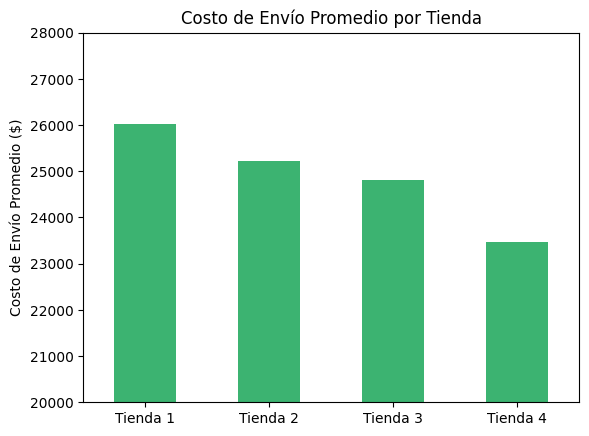

In [21]:
###***Graficos***###
#generar un grafico de barras para comparar el costo de envío promedio de las cuatro tiendas, acotar entre 20000 y 28000.
costo_envio_promedio = {f'Tienda {x}': eval(f'tienda{x}["Costo de envío"].mean()') for x in range(1,5)}
df_costo_envio = pd.DataFrame.from_dict(costo_envio_promedio, orient='index', columns=['Costo de Envío Promedio'])
ax = df_costo_envio.plot(kind='bar', color='mediumseagreen', legend=False)
plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Costo de Envío Promedio ($)')
plt.ylim(20000, 28000)  # Ajustar el límites del eje y para mayor detalle
plt.xticks(rotation=0)  
